In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/neosoft/Documents/news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Get the Independant features
x = df.drop('label',axis=1)

In [6]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
# Get the Dependant feature
y = df['label']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [9]:
df = df.dropna()

In [10]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
messages = df.copy()

In [12]:
messages.reset_index(inplace= True) # to get indexes in order after dropping NAN values

In [13]:
messages.head(8)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [14]:
## TEXT PREPROCESSING
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[4]

'iranian woman jail fiction unpublish stori woman stone death adulteri'

In [16]:
## TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features = 5000, ngram_range=(1,3))
x = tfidf_v.fit_transform(corpus).toarray()

In [17]:
x.shape

(18285, 5000)

In [18]:
y = messages['label']

In [19]:
# Divide dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33, random_state=0)

In [20]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [21]:
tfidf_v.get_params()  # things which applied in TFIDF

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(x_train, columns=tfidf_v.get_feature_names()) # To check how vectors are form

In [23]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'CONFUSION MATRIX',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("NORMALIZED CONFUSION MATRIX")
    else:
        print("CONFUSION MATRIX, WITHOUT NORMALIZATION")
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j ,i , cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("TRUE LABEL")
    plt.xlabel("PREDICTED LABEL")

## MULTINOMIAL NAIVE BAYES

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [27]:
from sklearn import metrics
import numpy as np
import itertools

ACCURACY :  0.881
CONFUSION MATRIX, WITHOUT NORMALIZATION


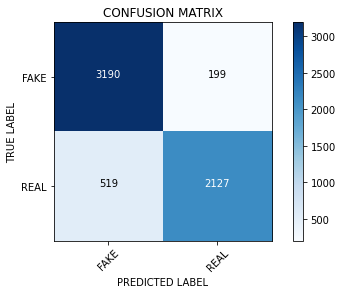

In [28]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("ACCURACY :  %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("SCORE :", score)

SCORE : 0.8810273405136703


In [30]:
y_train.shape

(12250,)

##  Passive Aggressive Classifier Algorithm

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_cf = PassiveAggressiveClassifier(n_iter_no_change= 50)

ACCURACY : 0.918
CONFUSION MATRIX, WITHOUT NORMALIZATION


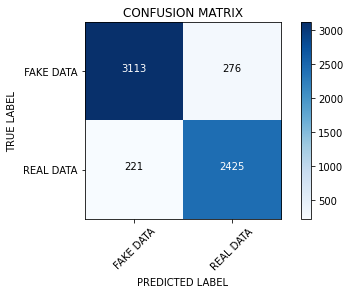

In [32]:
linear_cf.fit(x_train,y_train)
pred = linear_cf.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("ACCURACY : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[" FAKE DATA", "REAL DATA"])

## Multinomial NB with Hyperparameter

In [33]:
classifier = MultinomialNB(alpha = 0.1)

In [34]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB( alpha = alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("ALPHA: {}, SCORE: {}".format(alpha,score))

ALPHA: 0.0, SCORE: 0.8662800331400166
ALPHA: 0.1, SCORE: 0.8777133388566695
ALPHA: 0.2, SCORE: 0.8801988400994201
ALPHA: 0.30000000000000004, SCORE: 0.87986743993372
ALPHA: 0.4, SCORE: 0.8808616404308203
ALPHA: 0.5, SCORE: 0.8806959403479702
ALPHA: 0.6000000000000001, SCORE: 0.8815244407622204
ALPHA: 0.7000000000000001, SCORE: 0.8813587406793704
ALPHA: 0.8, SCORE: 0.8816901408450705
ALPHA: 0.9, SCORE: 0.8816901408450705


In [36]:
# Get feature names
feature_names = tfidf_v.get_feature_names()

In [37]:
classifier.coef_[0] # getting coefficient value --- most negative value is most fakest value

array([-8.79747339, -8.50390794, -8.86748348, ..., -9.89972258,
       -8.39148017, -9.09223723])

In [38]:
# Most Real:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.9540335550698495, 'hillari'),
 (-4.985143813810478, 'trump'),
 (-5.09396777078389, 'clinton'),
 (-5.406224434792623, 'elect'),
 (-5.720704731812889, 'video'),
 (-5.773549474756074, 'comment'),
 (-5.796370993571742, 'war'),
 (-5.813919655860566, 'us'),
 (-5.886315118097155, 'fbi'),
 (-5.887681855526012, 'hillari clinton'),
 (-5.937650910283555, 'vote'),
 (-5.955192196052632, 'world'),
 (-6.040948488999476, 'email'),
 (-6.133757591036376, 'obama'),
 (-6.144495883768216, 'america'),
 (-6.164714961804142, 'russia'),
 (-6.228464630593834, 'day'),
 (-6.234273085996778, 'american'),
 (-6.288053898708686, 'break'),
 (-6.3129601417365455, 'presid')]

## HASHING VECTORIZER

In [57]:
hs_vectorizer = HashingVectorizer(n_features= 5000, alternate_sign=False )
x = hs_vectorizer.fit_transform(corpus).toarray()

In [58]:
x.shape

(18285, 5000)

In [59]:
x

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
## Multinomial NB

In [61]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33, random_state=0)

ACCURACY :  0.871
CONFUSION MATRIX, WITHOUT NORMALIZATION


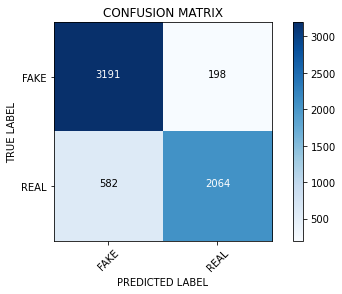

In [63]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("ACCURACY :  %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [64]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("SCORE :", score)

SCORE : 0.8707539353769677


In [65]:
## Multinomal NB with Hyperparameter

In [66]:
classifier = MultinomialNB(alpha = 0.1)

In [67]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB( alpha = alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("ALPHA: {}, SCORE: {}".format(alpha,score))

ALPHA: 0.0, SCORE: 0.8293289146644574
ALPHA: 0.1, SCORE: 0.871913835956918
ALPHA: 0.2, SCORE: 0.8737365368682685
ALPHA: 0.30000000000000004, SCORE: 0.8737365368682685
ALPHA: 0.4, SCORE: 0.8732394366197183
ALPHA: 0.5, SCORE: 0.8735708367854184
ALPHA: 0.6000000000000001, SCORE: 0.8727423363711682
ALPHA: 0.7000000000000001, SCORE: 0.8722452361226181
ALPHA: 0.8, SCORE: 0.8710853355426678
ALPHA: 0.9, SCORE: 0.8710853355426678


In [69]:
classifier.coef_[0] # getting coefficient value --- most negative value is most fakest value

array([-9.07788046, -6.98564272, -9.05997912, ..., -9.68688606,
       -9.93200852, -9.13511477])

In [70]:
# Most Real:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.159789412375418, 'harvey'),
 (-4.433248240150211, 'streisand'),
 (-4.587412361748534, 'ireland'),
 (-4.880889915160542, 'crackdown'),
 (-5.375140338841306, 'settlement'),
 (-5.441974235189287, 'ross'),
 (-5.47657294820652, 'conceal'),
 (-5.48034927914219, 'style'),
 (-5.581875287659737, 'child'),
 (-5.5942462781798, 'extend'),
 (-5.626472474439868, 'post elect'),
 (-5.735237193850884, 'afghan'),
 (-5.749888950121218, 'voter fraud'),
 (-5.774146153707202, 'england'),
 (-5.919583292663727, 'stock'),
 (-5.9355411513544745, 'car new'),
 (-5.949273127413766, 'nevada'),
 (-5.96972292454915, 'confus'),
 (-5.993862768984146, 'journal'),
 (-5.998179635670369, 'coup')]